# Imports 

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time

vacancies = []

# Parsing of Vacancies from Kazan

In [2]:
driver = webdriver.Chrome()  
for page in range(16):
    driver.get(f"https://hh.ru/search/vacancy?text=разработчик&area=88&page={page}")
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    for vacancy in soup.find_all('div', class_='vacancy-info--ieHKDTkezpEj0Gsx'):
        link = vacancy.find('a')['href']
        vacancies.append(link)

driver.quit()

In [3]:
len(vacancies)

750

# Parsing of Vacancies from Moskow

In [4]:
driver = webdriver.Chrome()  
for page in range(16):
    driver.get(f"https://hh.ru/search/vacancy?text=разработчик&area=1&page={page}")
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    for vacancy in soup.find_all('div', class_='vacancy-info--ieHKDTkezpEj0Gsx'):
        link = vacancy.find('a')['href']
        vacancies.append(link)

driver.quit()

In [5]:
len(vacancies)

1558

In [8]:
import pandas as pd

df = pd.DataFrame(vacancies)
df.to_csv('vacancies.csv')

In [9]:
companies = []
experiences = []
skills = []

# All 1500+ vacancies data parsing

In [23]:
driver = webdriver.Chrome()  

for link in vacancies[:]:
    driver.get(link)
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # get company name
    elem = soup.find("div",class_="vacancy-company-details").find('a')
    if elem:
        company = elem.get_text()
        companies.append(company)

    # get exprerience
    elem = soup.find("p",class_="magritte-text___pbpft_3-0-32 magritte-text_style-primary___AQ7MW_3-0-32 magritte-text_typography-label-2-regular___ia7GB_3-0-32").find("span")
    if elem:
        experience = elem.get_text()
        experiences.append(experience)
    
    # skills extraction
    list = soup.find("ul",class_="vacancy-skill-list--JsTYRZ5o6dsoavK7")
    if list:
        for li in list:
            skills.append(li.find("div",class_="magritte-tag__label___YHV-o_3-1-13").get_text())
    print(f'appended {elem} and {list}')


driver.quit()


appended <span data-qa="vacancy-experience">3–6 лет</span> and <ul class="vacancy-skill-list--JsTYRZ5o6dsoavK7"><li data-qa="skills-element"><div class="magritte-tag___WdGxk_3-1-13 magritte-tag_style-neutral___cw1Bt_3-1-13 magritte-tag_size-medium___Splpy_3-1-13"><div class="magritte-tag__label___YHV-o_3-1-13">PHP</div></div></li><li data-qa="skills-element"><div class="magritte-tag___WdGxk_3-1-13 magritte-tag_style-neutral___cw1Bt_3-1-13 magritte-tag_size-medium___Splpy_3-1-13"><div class="magritte-tag__label___YHV-o_3-1-13">Laravel</div></div></li><li data-qa="skills-element"><div class="magritte-tag___WdGxk_3-1-13 magritte-tag_style-neutral___cw1Bt_3-1-13 magritte-tag_size-medium___Splpy_3-1-13"><div class="magritte-tag__label___YHV-o_3-1-13">Kubernetes</div></div></li><li data-qa="skills-element"><div class="magritte-tag___WdGxk_3-1-13 magritte-tag_style-neutral___cw1Bt_3-1-13 magritte-tag_size-medium___Splpy_3-1-13"><div class="magritte-tag__label___YHV-o_3-1-13">PostgreSQL</div><

In [43]:
print(len(skills),len(experiences),len(companies))

7053 1282 1558


# Plots drawing

In [63]:
df_skills = pd.DataFrame({
    'index': range(len(skills)),
    'skills': skills
    })
df_experiences = pd.DataFrame({
    'index': range(len(experiences)),
    'experience': experiences
    })
df_companies = pd.DataFrame({
    'index': range(len(companies)),
    'company': companies
    })
df_skills.to_csv('skills.csv')
df_experiences.to_csv('experiences.csv')    
df_companies.to_csv('companies.csv')

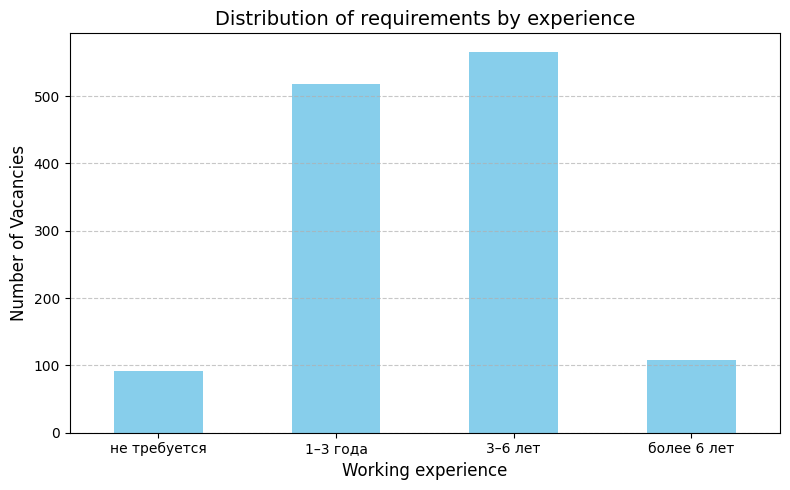

In [61]:
import matplotlib.pyplot as plt

ordered_levels = ['не требуется', '1–3 года', '3–6 лет', 'более 6 лет']

exp_counts = df_experiences['experience'].value_counts().reindex(ordered_levels)

plt.figure(figsize=(8,5))
exp_counts.plot(kind='bar',color='skyblue')

plt.title('Distribution of requirements by experience', fontsize=14)
plt.xlabel('Working experience', fontsize=12)
plt.ylabel('Number of Vacancies', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

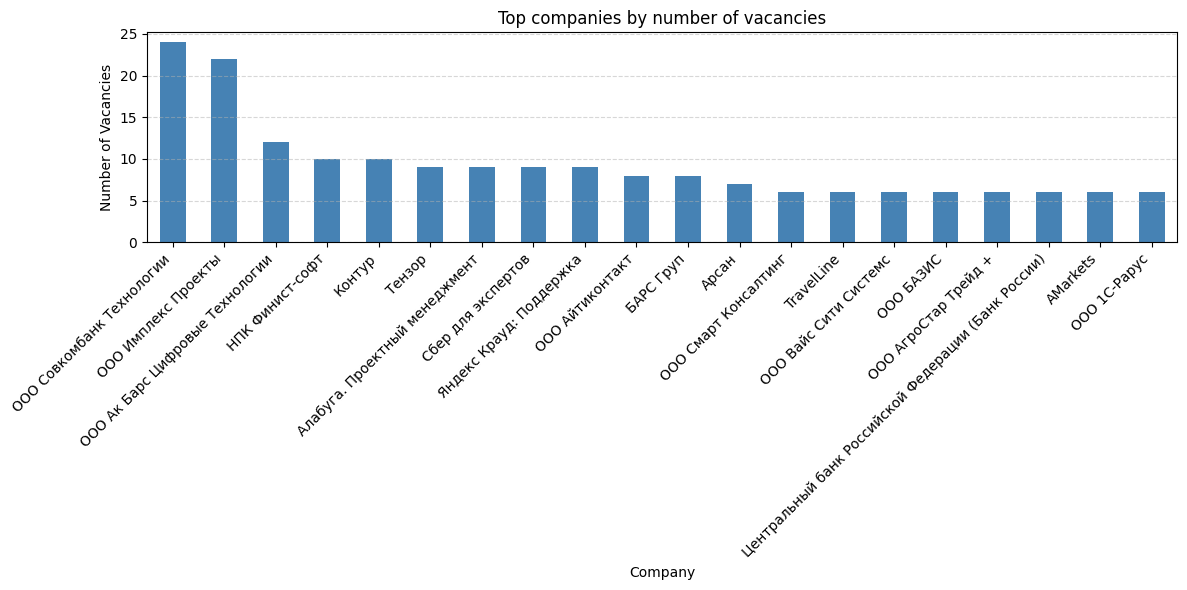

In [62]:
top_companies = df_companies['company'].value_counts().head(20)

plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar', color='steelblue')
plt.title('Top companies by number of vacancies')
plt.ylabel('Number of Vacancies')
plt.xlabel('Company')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

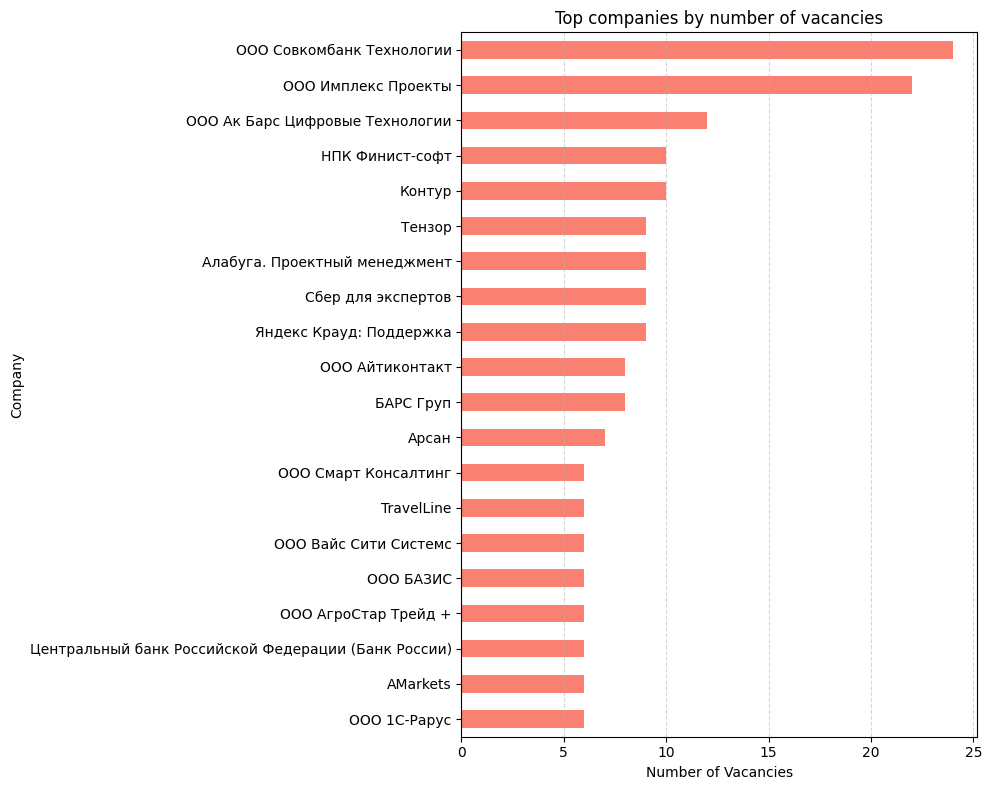

In [58]:
plt.figure(figsize=(10, 8))
top_companies.plot(kind='barh', color='salmon')
plt.title('Top companies by number of vacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('Company')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

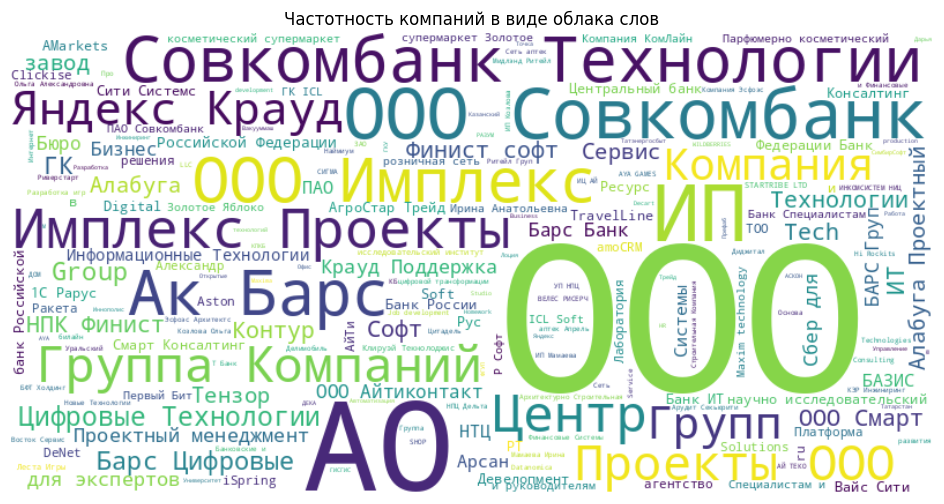

In [68]:
from wordcloud import WordCloud

text = ' '.join(df_companies['company'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Частотность компаний в виде облака слов')
plt.show()

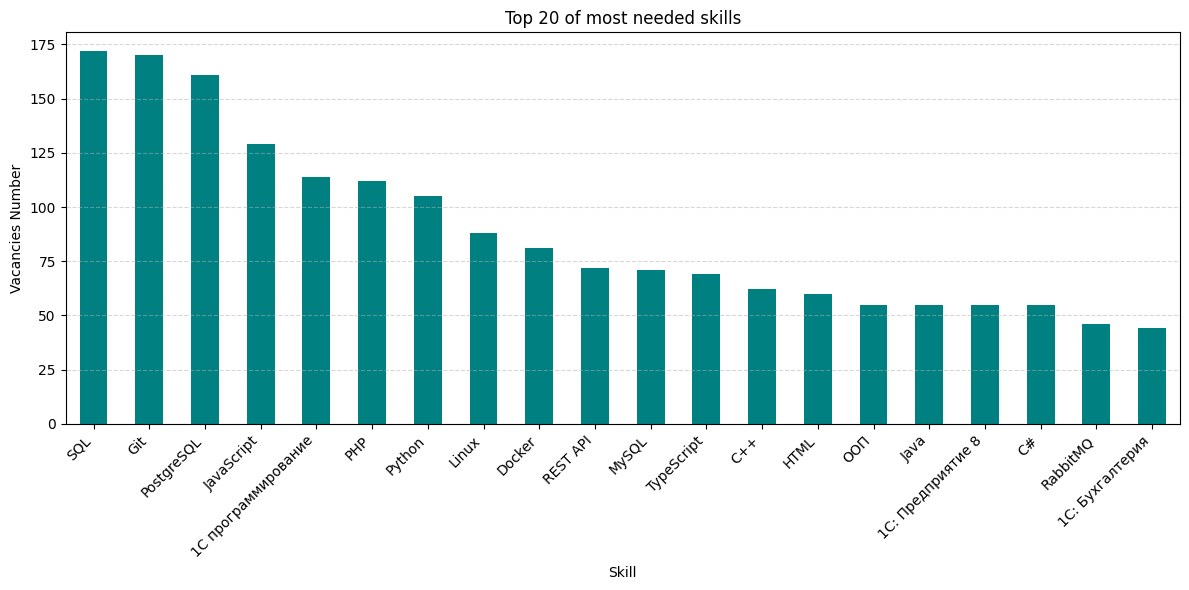

In [82]:
skills_count = df_skills['skills'].value_counts().head(20)

# Построение графика
plt.figure(figsize=(12, 6))
skills_count.plot(kind='bar', color='teal')
plt.title('Top 20 of most needed skills')
plt.xlabel('Skill')
plt.ylabel('Vacancies Number')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


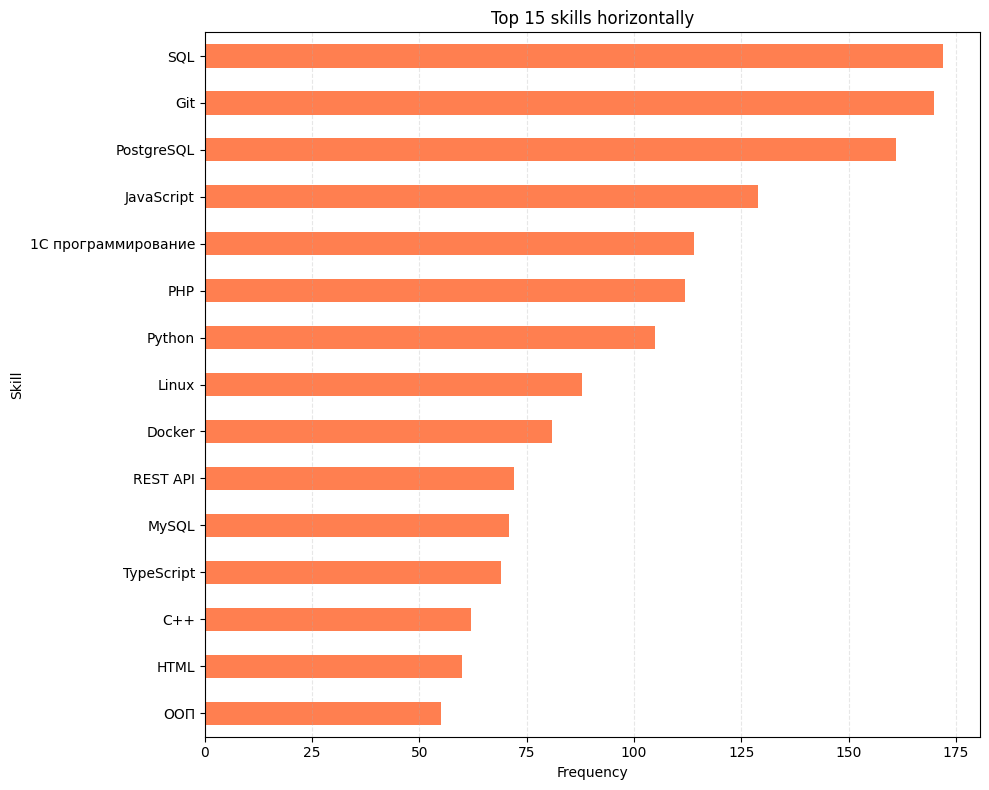

In [84]:
top_skills = df_skills['skills'].value_counts().head(15)

plt.figure(figsize=(10, 8))
top_skills.plot(kind='barh', color='coral')
plt.title('Top 15 skills horizontally')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()